In [ ]:
#Problem 1-1

#Decision Variables
ut #amount of cakes produced per month
hk #cost to hold a cake
fkt #cost of cake production
bk #amount of cakes in inventory
ckt #variable cost for a cake
dkt #cake demand
bi #binary value

#Objective
minimize
sum(fkt+(ut*ckt)+(hk*(bk+ut-dkt))) for k in K & for t in I

#Constraints
bk+ut = dkt
ut >= bk
bk+ut >= bk
mkt <= M*bi

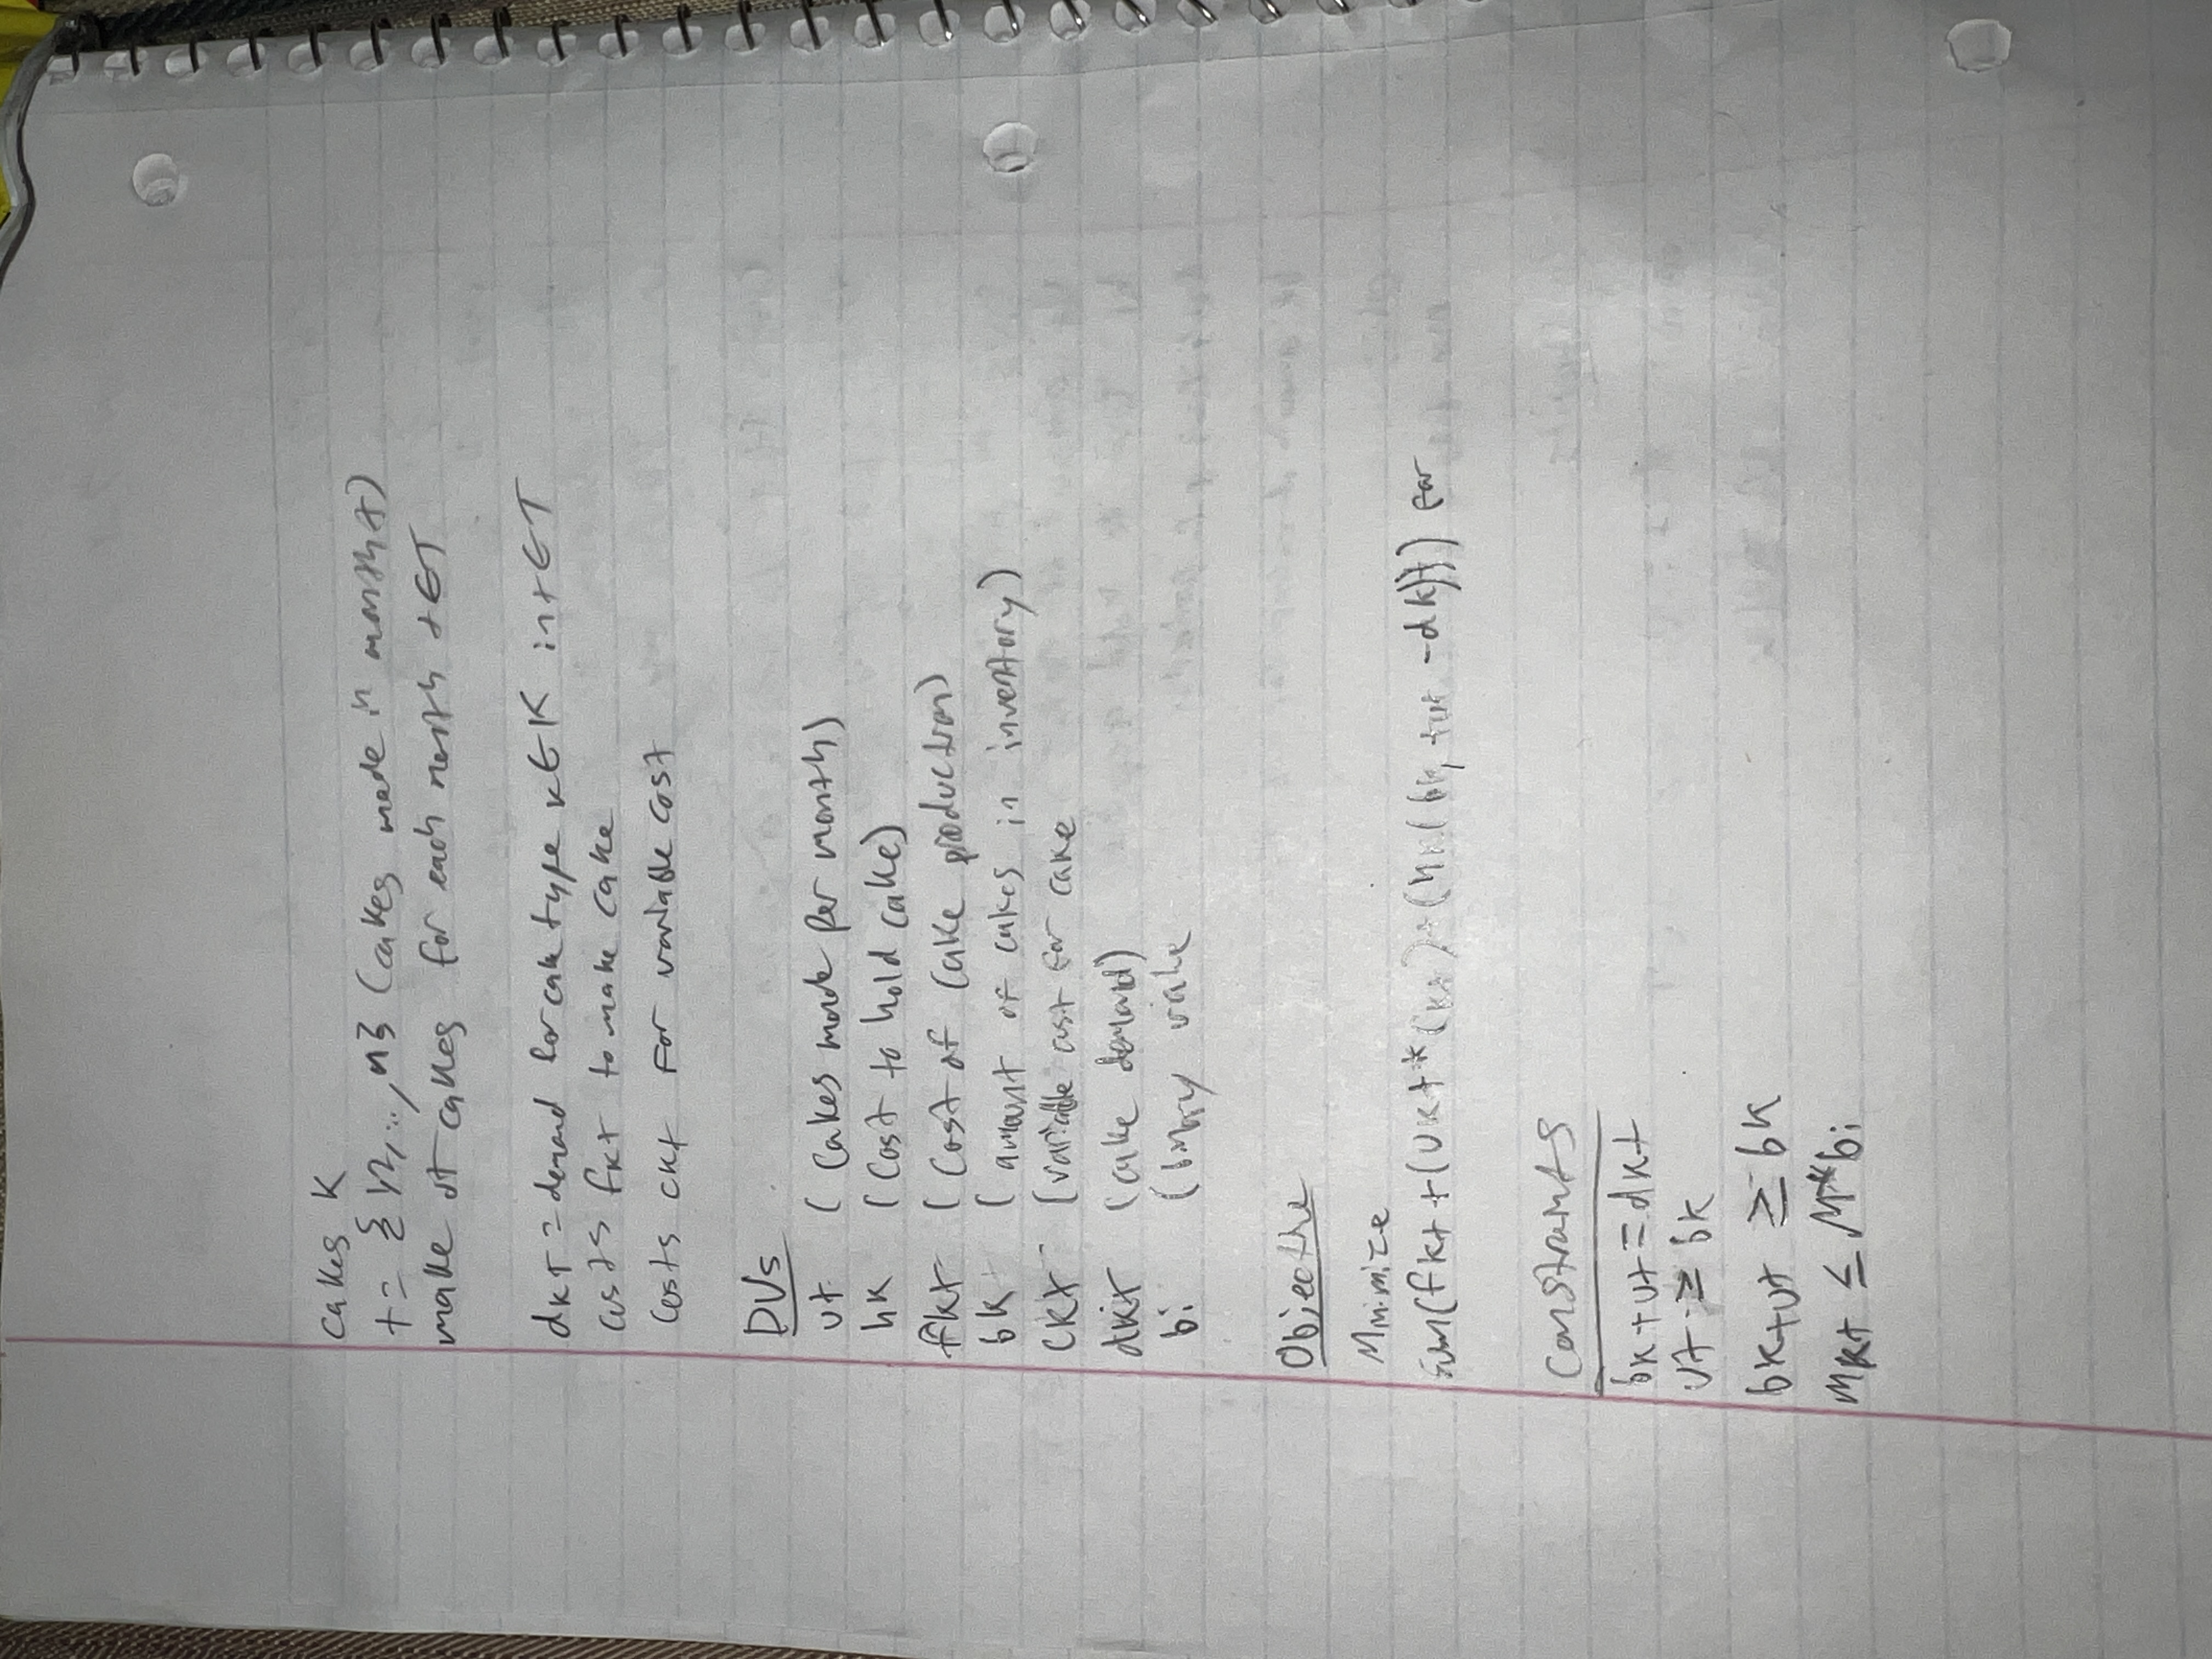

In [ ]:
#Problem 2-1
DVs
A
B
C
D
E
F

Objective
Max
50A+20B+60C+65D+15E+70F

Constraints
5A+7B+10C+12D+2E+5F<=18

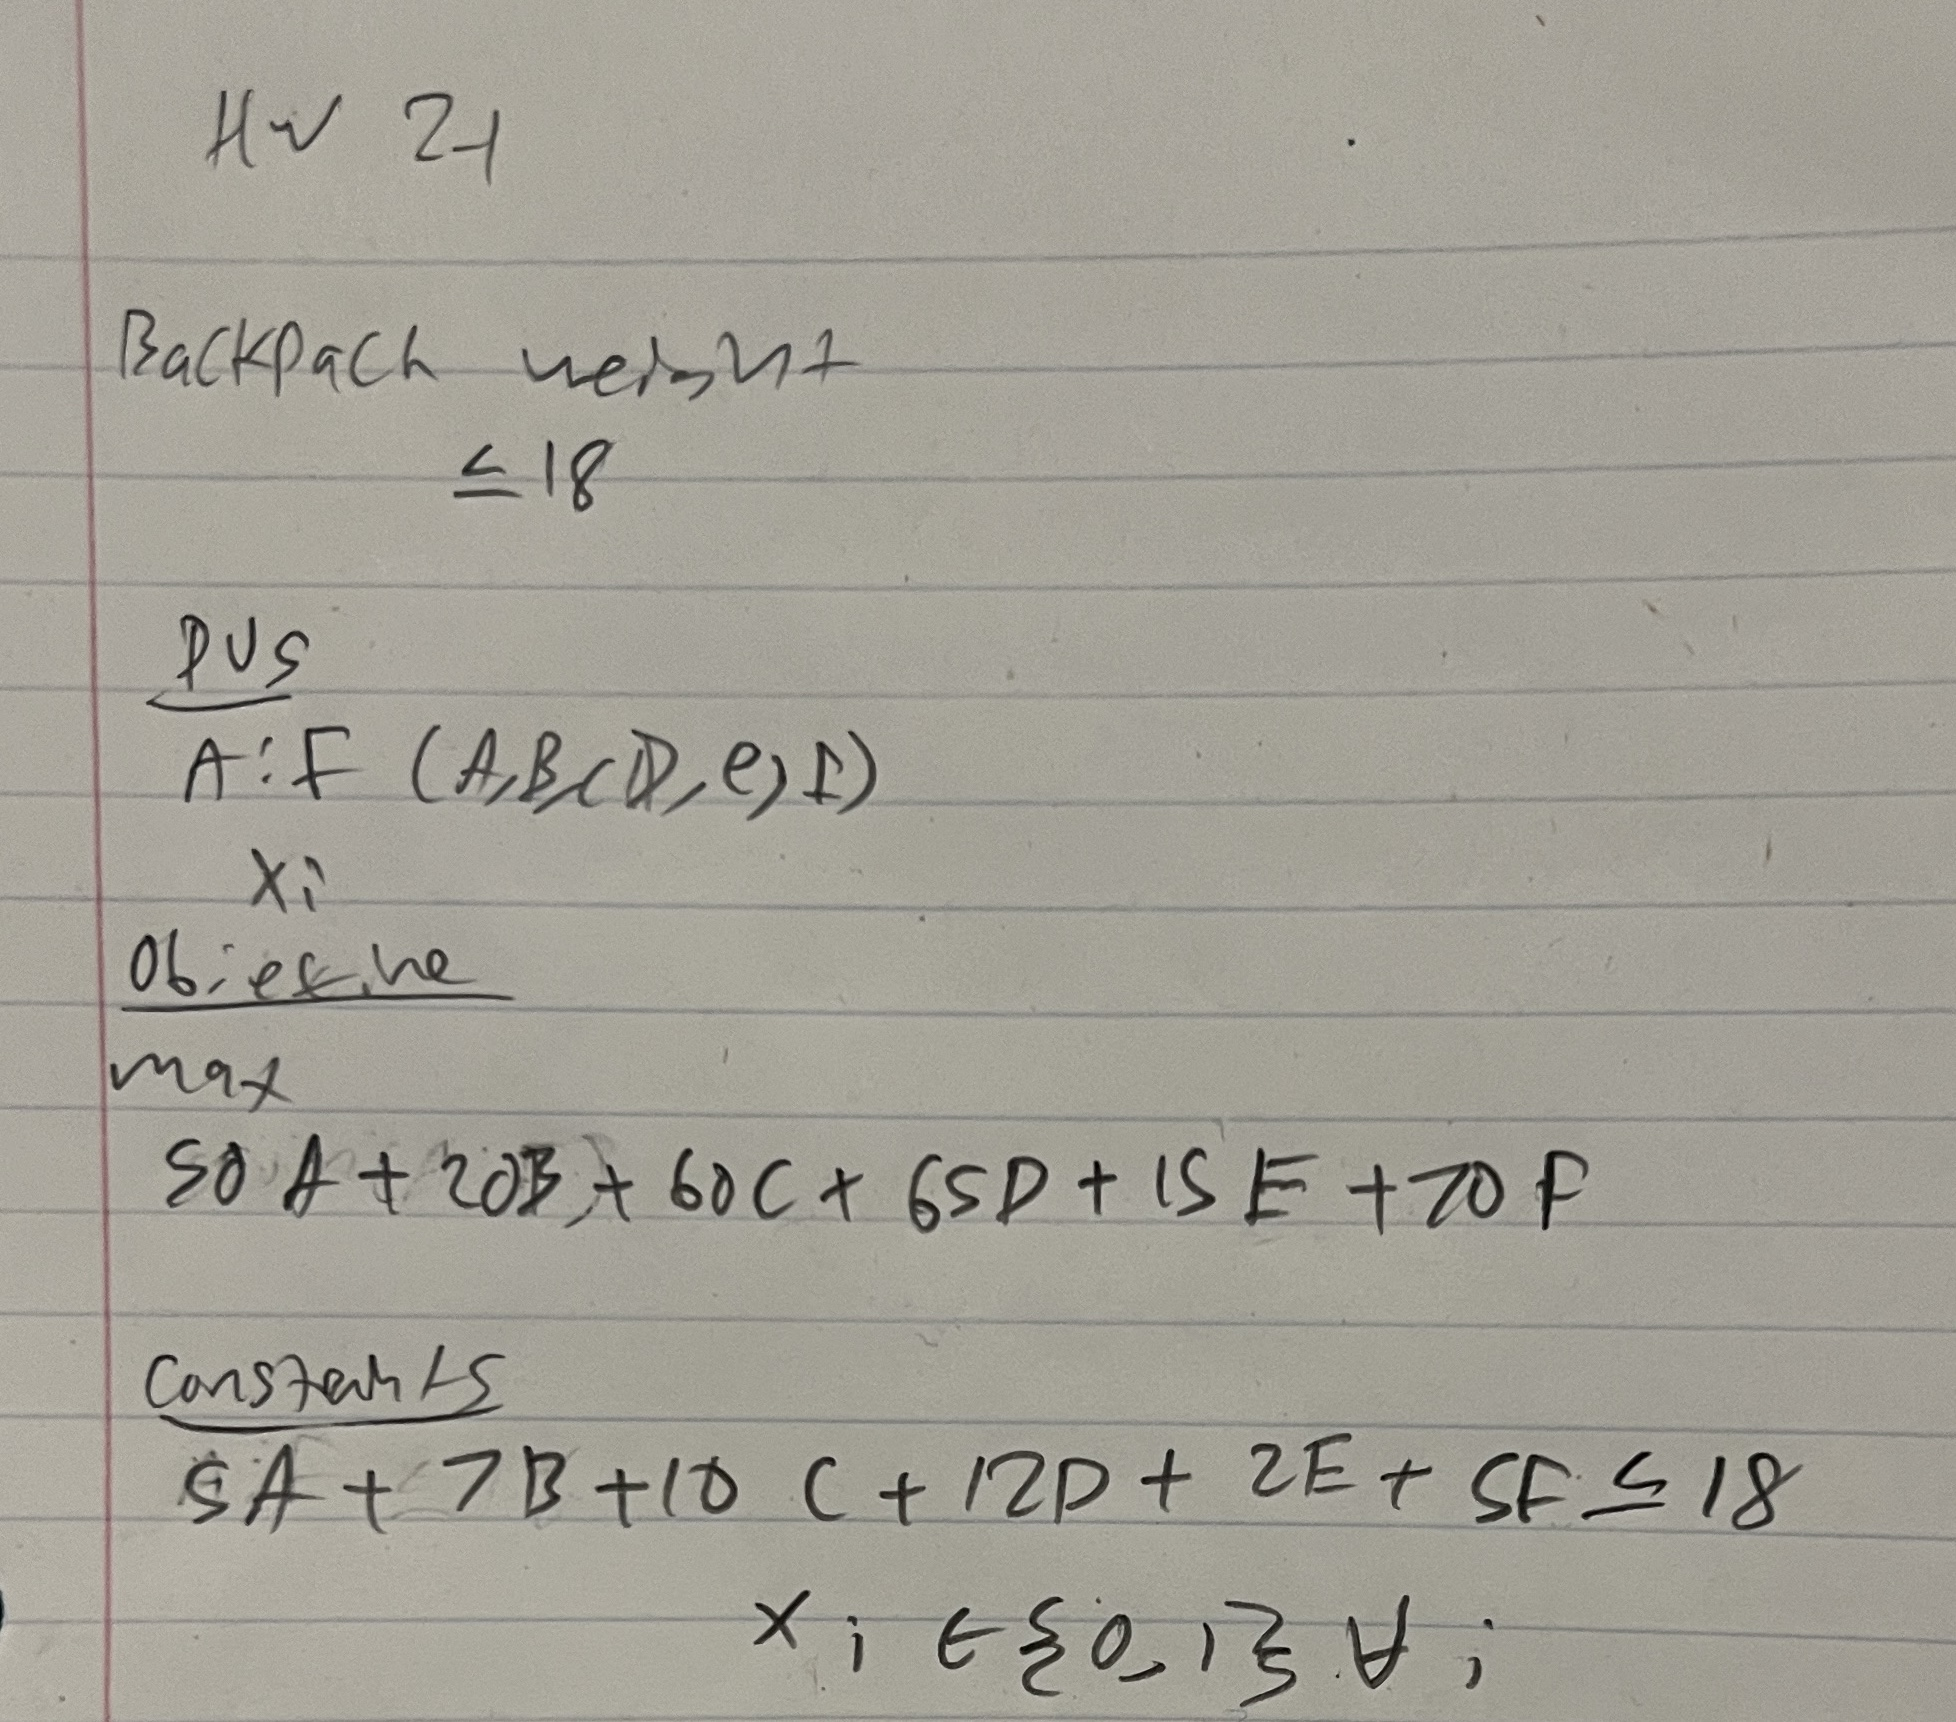

In [1]:
#Problem 2-2
using JuMP, Cbc, NamedArrays

items = [
    :A,
    :B,
    :C,
    :D,
    :E,
    :F
]

weight = Dict(zip(items, [5,7,10,12,2,5]))
value = Dict(zip(items, [50,20,60,65,15,70]))
        
m=Model()
#DVs
@variable(m, x[items]>=0, Bin)

#Objective
@objective(m, Max, sum(value[i]*x[i] for i in items))

#Constraints
#@constraint(m, item[i in items], i >=0)
@constraint(m, weight[weight in items], sum(x[weight]) <=18)


set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 280 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -280 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 0 times and cre

Problem 2-3
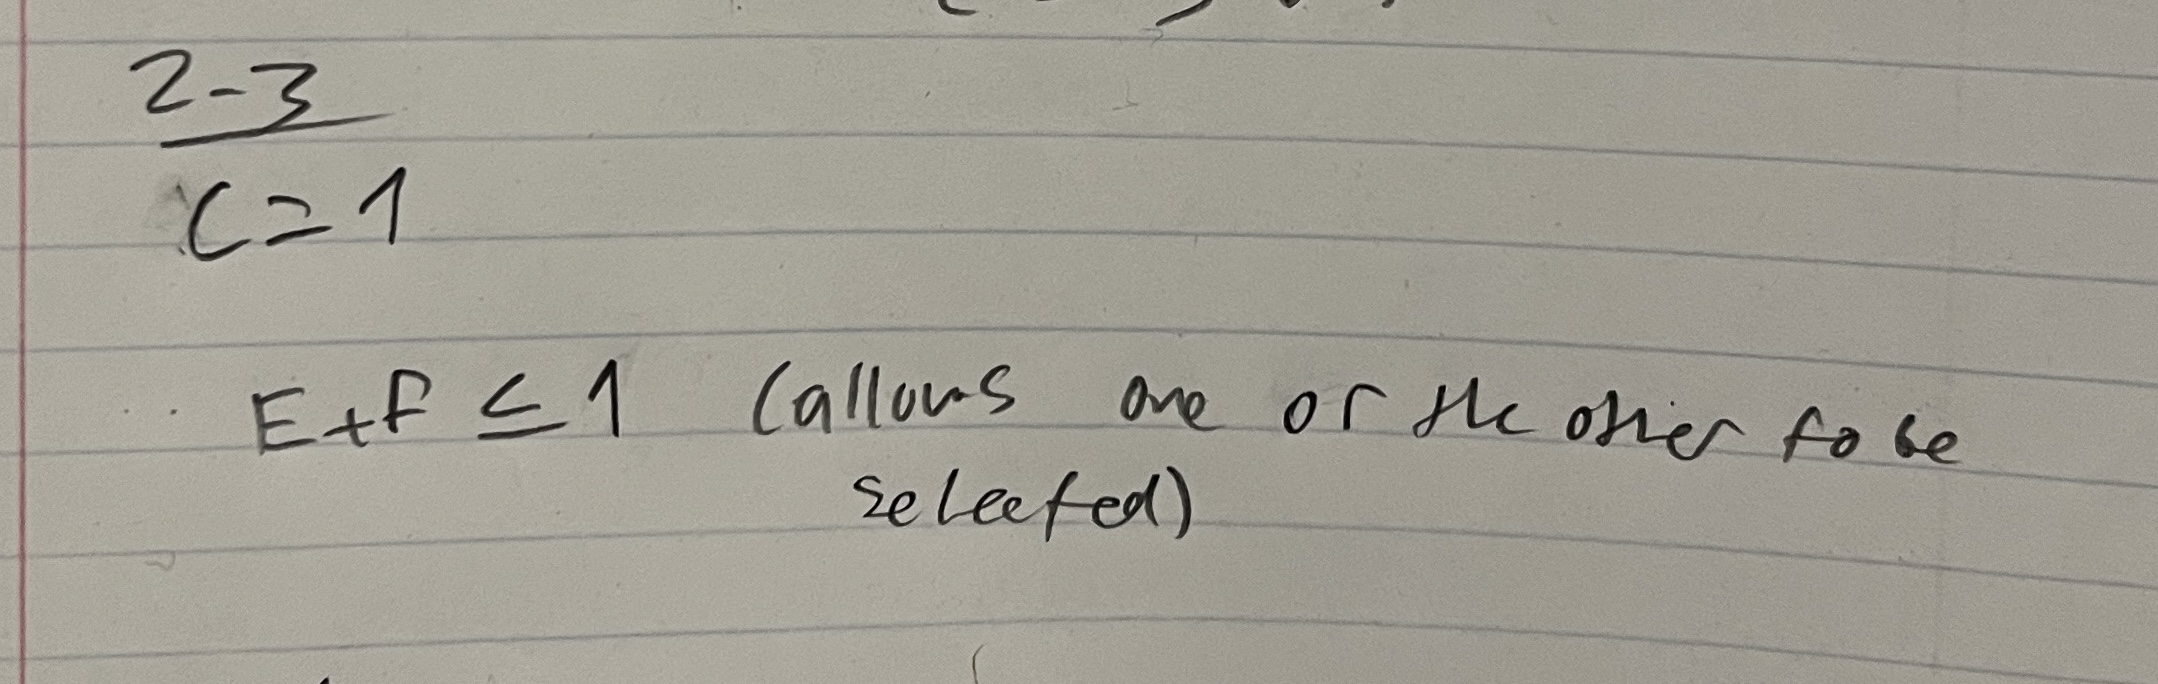

Campstove = 1, ensures campstove is coming |
Socks + Spray <= 1, allows one or the other to come because both together would be greater than 1

Problem 2-4
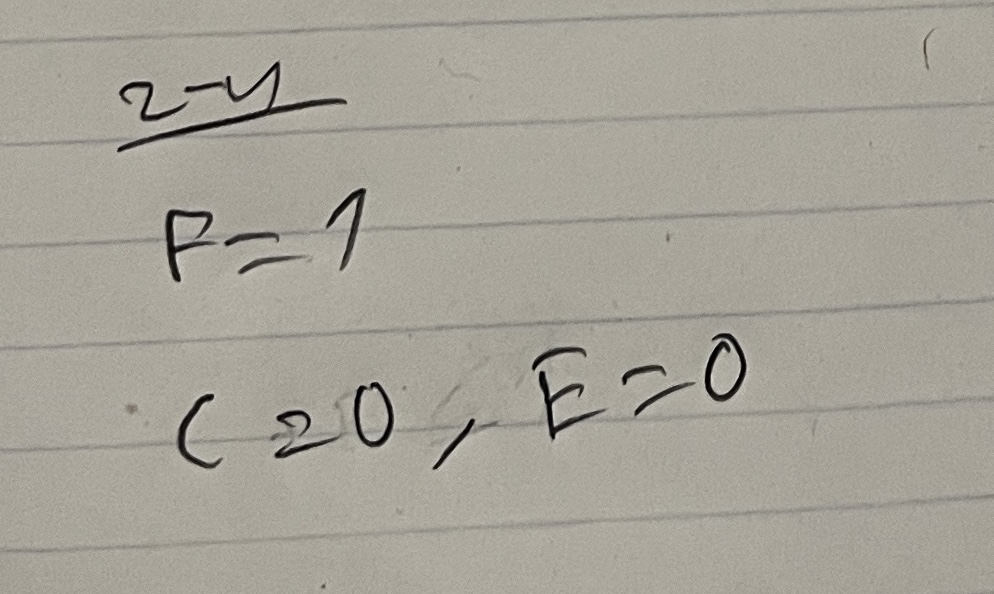

Socks = 1, ensures socks are coming |
Campstove = 0 and Spray = 0 because neither can come if socks are coming

In [ ]:
#Problem 3-1

Sets
Items: Pear, Mango, Apricot
Resources: 3000 Chips, 1200 labor hours

Parameters
ri: revenue of each computer
ari: resources required to make
br: total amount of resources

DVs
xi: number of computers to make in Items
yi: binary variable

Objective
Maximize xi : make as many computers as possible

Constraints
ari*xi <= br for r in R #Resource constraint
sum(xi) <1200 #labor constraint
xi >= 500, 400, 300 #respectively for each computer
xi >=0

In [2]:
#Problem 3-2
using JuMP, Cbc, NamedArrays

computers = [:Pear, :Apricot, :Mango]
labor =  Dict(zip(computers,[1,2,1.8]))
chips =  Dict(zip(computers,[2,5,6]))
sell =  Dict(zip(computers,[400,900,1000]))
production = Dict(zip(computers,[500,400,300]))
M = Dict(zip(computers,[2500, 1500, 1200]))

m = Model()

@variable(m, x[computers] >= 0)
@variable(m, y[computers] >=0)

@objective(m, Max, sum(sell[i]*x[i] for i in computers))

@constraint(m, sum(chips[i] * x[i] for i in computers ) <= 3000) #chip constraint
@constraint(m, sum(labor[i] * x[i] for i in computers) <= 1200) #labor constraint
@constraint(m, prod[i in computers], x[i] >= production[i]*y[i])

#@constraint(m, rhs[i in computers], x[i] >= 1000*y[i])
#@constraint(m, bin[i in computers], y[i] == 0)

@constraint(m, bound[i in computers], x[i] <= M[i]*y[i])
@constraint(m, nonzero[i in computers], x[i] >= 0)


set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Presolve 2 (-9) rows, 3 (-3) columns and 6 (-15) elements
0  Obj -0 Dual inf 2700 (3)
3  Obj 550000
Optimal - objective value 550000
After Postsolve, objective 550000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 550000 - 3 iterations time 0.002, Presolve 0.00


In [ ]:
#Problem 4-1
DVs
xi : reduction time for activity i
    
Objective
Minimize 10* sum(xi) + 4*sum(xi)

constraints
sum(activites) - sum(xi) <= 18 #constraint to finish aging


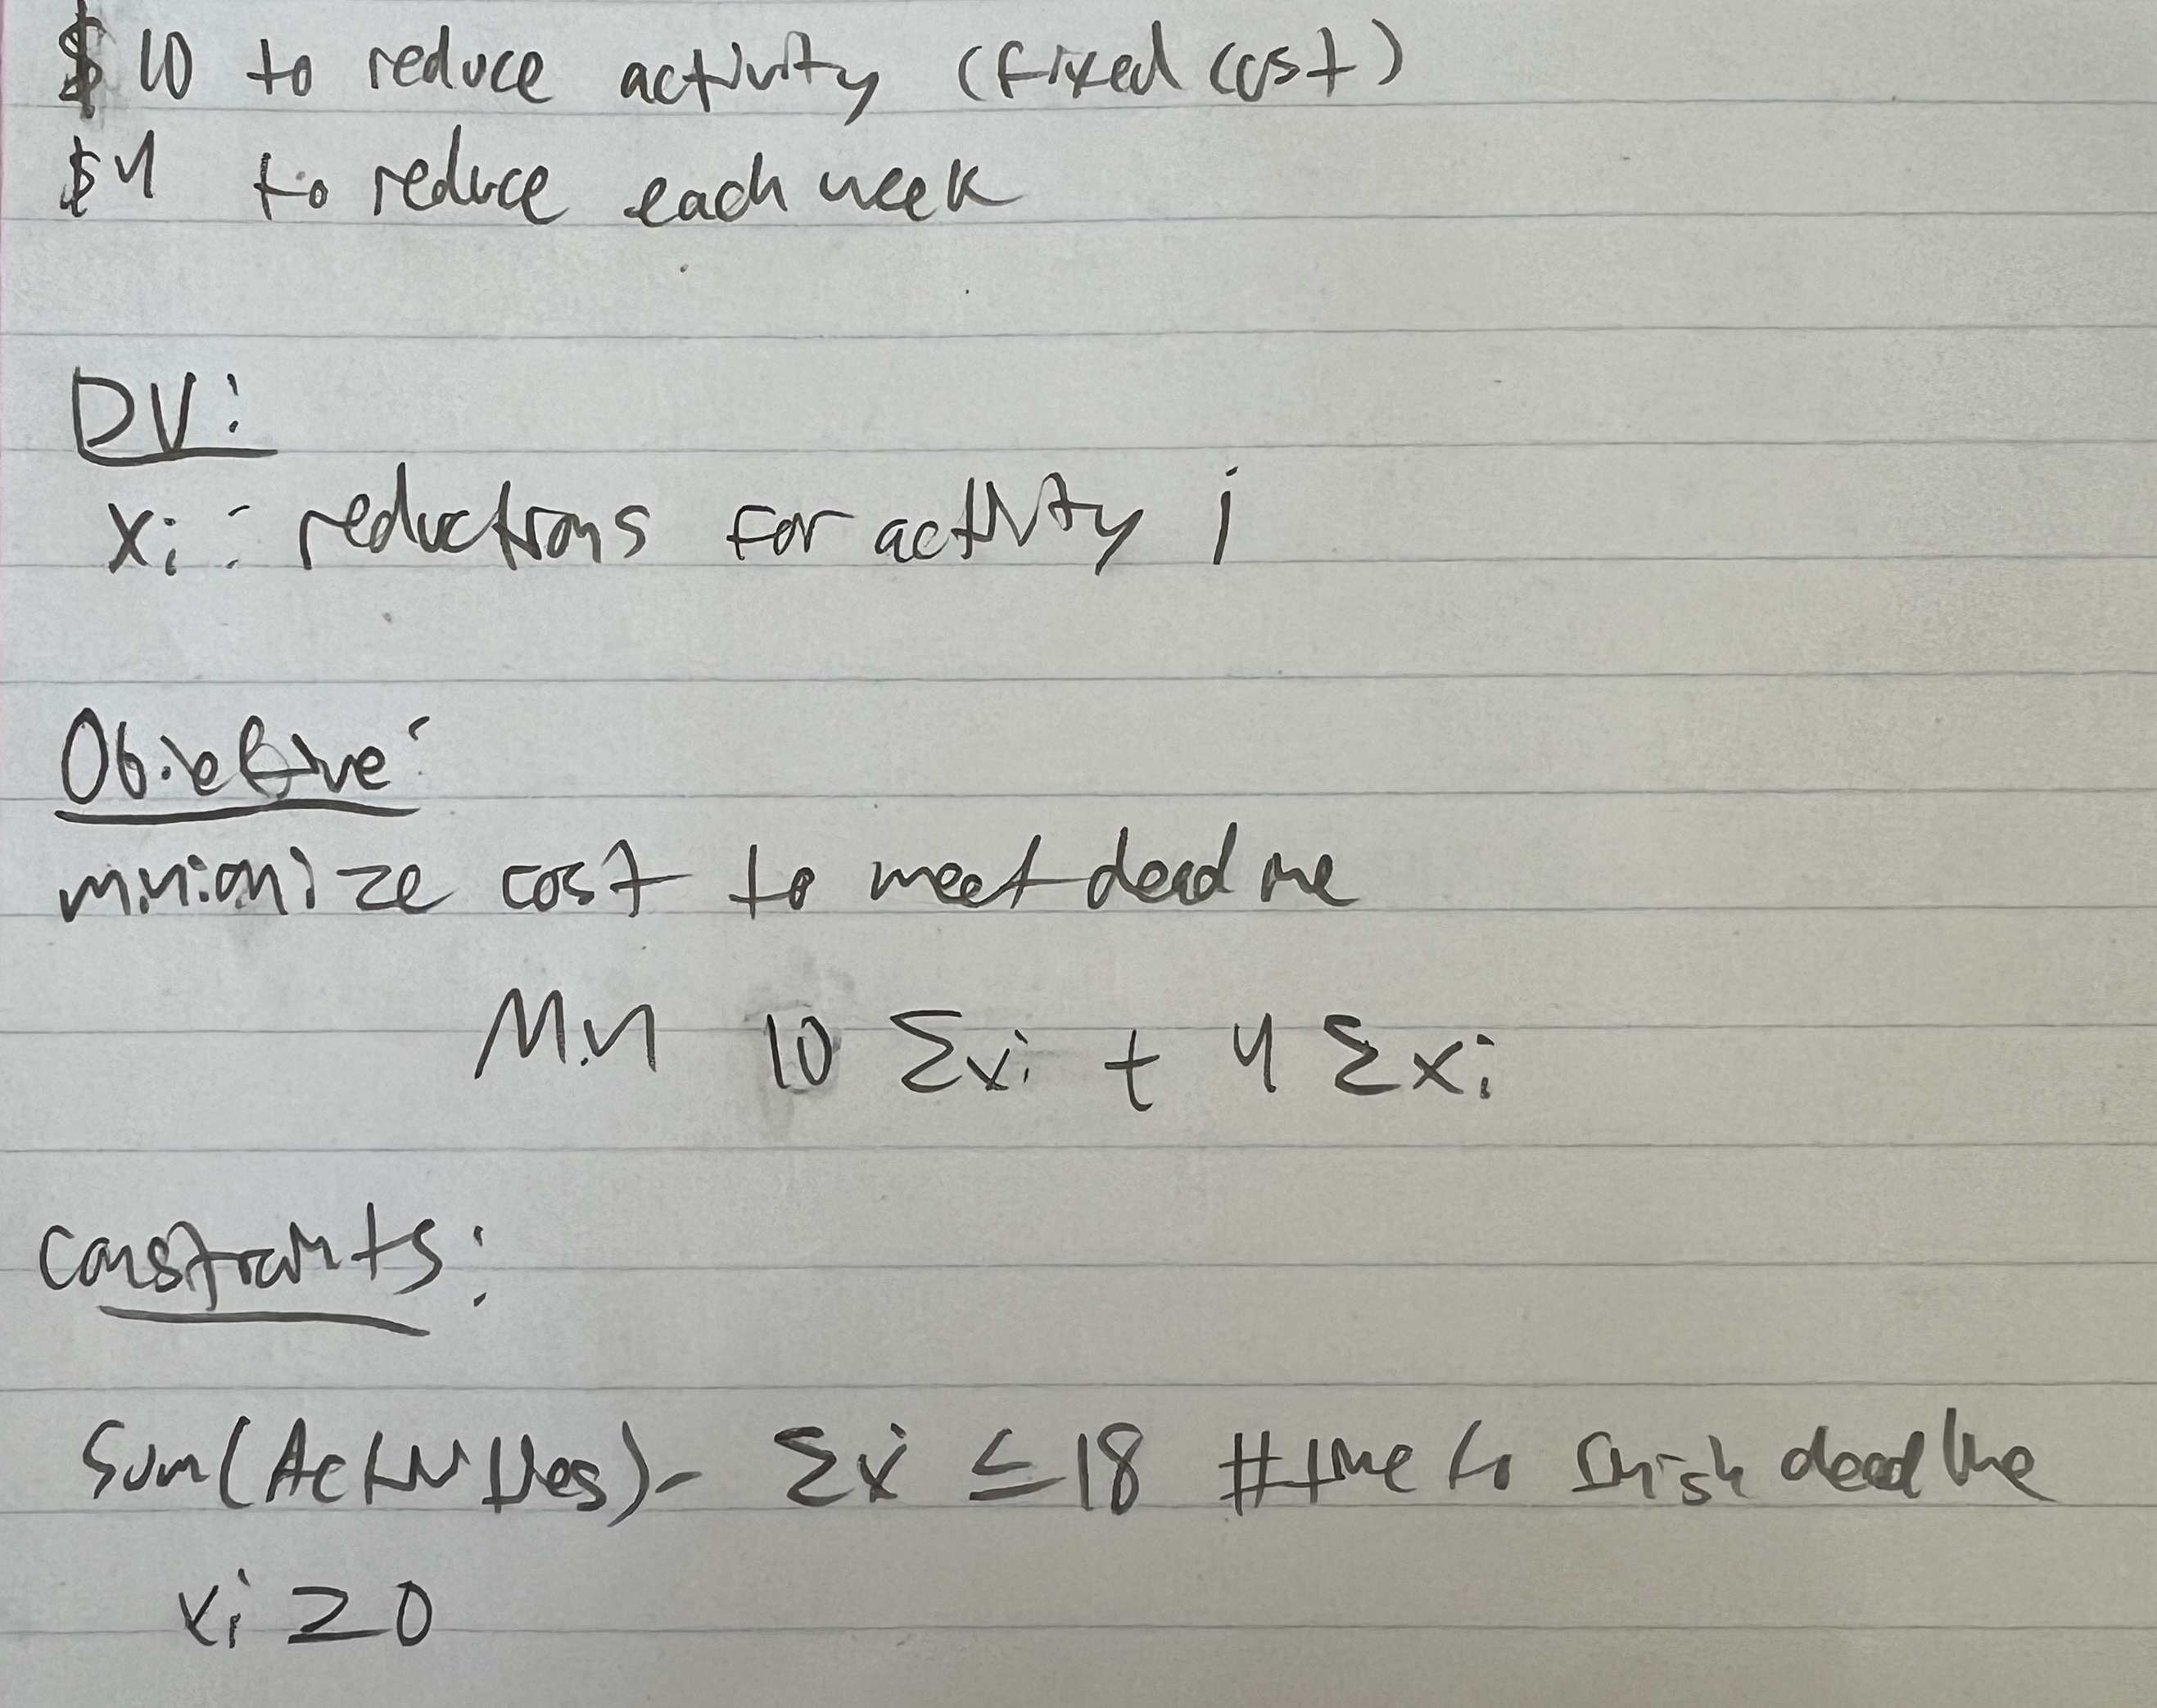

In [3]:
#Problem 4-2
using JuMP, Cbc, NamedArrays

activities = [:1, :2, :3, :4, :5, :6]
#label = Dict(zip(activities,[1,2,3,4,5,6]))
duration = Dict(zip(activities, [8,11,6,5,7,5]))
precedences = [(1,3),(2,4),(3,4),(3,5),(4,5),(4,6)]
#reduce = [[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
M = 4

m = Model()

@variable(m, x[activities] >=0)
@variable(m, 0 <= reduce[activities] <= 4)
@variable(m, finishtime)
@variable(m, y[activities] >=0, Bin)

@objective(m, Min, (10+4)*sum(x[i] for i in activities))

@constraint(m, minimax[i in activities], finishtime >= x[i] + duration[i] - reduce[i])
@constraint(m, precedence_relationships[(i,j) in precedences], x[j] >= x[i] + duration[i]-reduce[i])
@constraint(m, finishtime <= 18)
@constraint(m, decide[i in activities], reduce[i] <= M*y[i])



#@constraint(m, reduction[i in activities], duration[i] - reduce[i] >= 0)
#@constraint(m, totaltime[i in activities], sum(duration[i] - reduce[i]) <= 18)
#@constraint(m, nonzero[i in activities], reduce[i] >=0)

set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 378 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 378 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 0 times and crea